# Background

We derive expressions for the survival probability, denoted as $S(u | \theta)$, that two loci separated by $u$ units share the same most recent common ancestor for a pair of individuals, given a demographic model with parameters $\theta$.

## Under SMC

In [1]:
from sympy import *
init_printing()

Nec = Symbol('N_c', nonzero=True, positive=True) # Contemporary diploid population size
Nea = Symbol('N_a', nonzero=True, positive=True) # Ancient diploid population size
alpha = Symbol('alpha', nonzero=True) # Growing rate
t = Symbol('t', nonzero=True, positive=True) # Time
t0 = Symbol('t0', nonzero=True, positive=True) # Time t0
Ne_piece1 = Nec * exp(-t*alpha)
Ne_piece2 = Nea

In [2]:
u = Symbol('u', positive=True) # Distance (Morgan)
x = Symbol('x', positive=True) # Placeholder
gamma1 = 1 / (2*Ne_piece1) # Coalescent rate
Gamma1 = integrate(gamma1,(x, 0, t)) # Cumulative coalescent rate
tmrca1 = gamma1 * exp(-Gamma1)
# TMRCA density
Eq(symbols('f1(t|\\theta)'), tmrca1)

In [3]:
gamma2 = 1 / (2*Ne_piece2) # Coalescent rate
Gamma2 = Gamma1.subs({t : t0}) + integrate(gamma2,(x, t0, t)) # Cumulative coalescent rate
tmrca2 = gamma2 * exp(-Gamma2)
# TMRCA density
Eq(symbols('f2(t|\\theta)'), tmrca2)

In [4]:
# Under SMC, each recombination changes ancestry
Eq(symbols('S(u|t)'), exp(-2*t*u))

In [6]:
piece1 = simplify(exp(-2*t*u) * tmrca1)
piece2 = simplify(exp(-2*t*u) * tmrca2)
piece1, piece2

In [14]:
survival1 = integrate(exp(-2*t*u) * tmrca1, (t, 0, t0)).simplify()
survival2 = integrate(exp(-2*t*u) * tmrca2, (t, t0, oo)).simplify()

We have a close expression for the last piece and we can use numerical approximations based on Gaussian quadrature rules to approximate the first piece. 

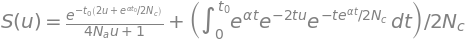

In [17]:
# Survival density for distance exactly equal to u
survival = survival1 + survival2
Eq(symbols('S(u)'), survival)

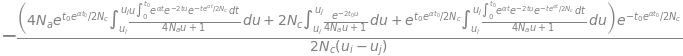

In [18]:
# Survival density for distance exactly equal to u
ui = Symbol('u_i', positive=True) # Distance (Morgan)
uj = Symbol('u_j', positive=True) # Distance (Morgan)

uniform_dist = 1 / (uj - ui)
survival_bin = integrate(survival * uniform_dist, (u, ui, uj)).simplify()
survival_bin

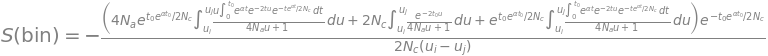

In [19]:
Eq(symbols('S(\\text{bin})'), survival_bin)

# Approximate SMC'


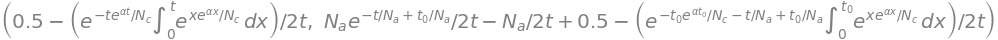

In [26]:
# Probability of healing event
ph1 = simplify(0.5 - exp(-2*Gamma1) / (2*t) * integrate(exp(2*Gamma1.subs({t: x})), (x, 0, t)))
ph2 = simplify(0.5 - exp(-2*Gamma2) / (2*t) * (integrate(exp(2*Gamma1.subs({t: x})), (x, 0, t0)) + integrate(exp(2*Gamma2.subs({t: x})), (x, t0, t))))
ph1, ph2

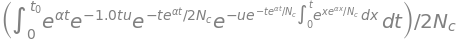

In [27]:
integrate(exp(-2*t*u*(1-ph1)) * tmrca1, (t, 0, t0))

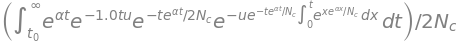

In [28]:
integrate(exp(-2*t*u*(1-ph1)) * tmrca1, (t, t0, oo))